# Figure 1: 
**Author:** Juan Bolanos  
**Date:** 2025-02-27  
**Description:** This notebook generates Figure **1B and Figure 1C** using R code.<br>
**Files Needed**: 
* [BEAST.log](https://zenodo.org/records/14946855/files/BEAST.log?download=1)



Find all date here:
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.14946855.svg)](https://doi.org/10.5281/zenodo.14946855)


### Step 1: Install Libraries

In [10]:
# Function to install missing packages
install_if_missing <- function(packages) {
    to_install <- packages[!(packages %in% installed.packages()[,"Package"])]
    if(length(to_install)) install.packages(to_install, dependencies = TRUE)
}

# List of required libraries
required_packages <- c("ggridges", "ggplot2", "tidyr", "dplyr")

# Install missing packages
install_if_missing(required_packages)

# Load libraries
library(ggridges)
library(ggplot2)
library(tidyr)
library(dplyr)


### Step 2: Read BEAST Log File
The BEAST log file (BEAST.log) contains parameter estimates sampled from the posterior distribution during the Markov Chain Monte Carlo (MCMC) process. This file is crucial for assessing convergence, effective sample sizes (ESS), and posterior distributions of model parameters.

In [84]:
#read BEAST log
df<-read.csv("/Users/juanbolanos/Desktop/Phylogenetisc_Paper/Dornburg-Review/Final-Data/scripts/Ridge_Line_Violin_Plot_Tracer_Frequencies/input/Geo_Location_Transition_Rates_OnToOn_vs_OnToOff.csv")


### Step 3: Plot On Campus vs Off Campus
Plot with ggplot (geom_violin)


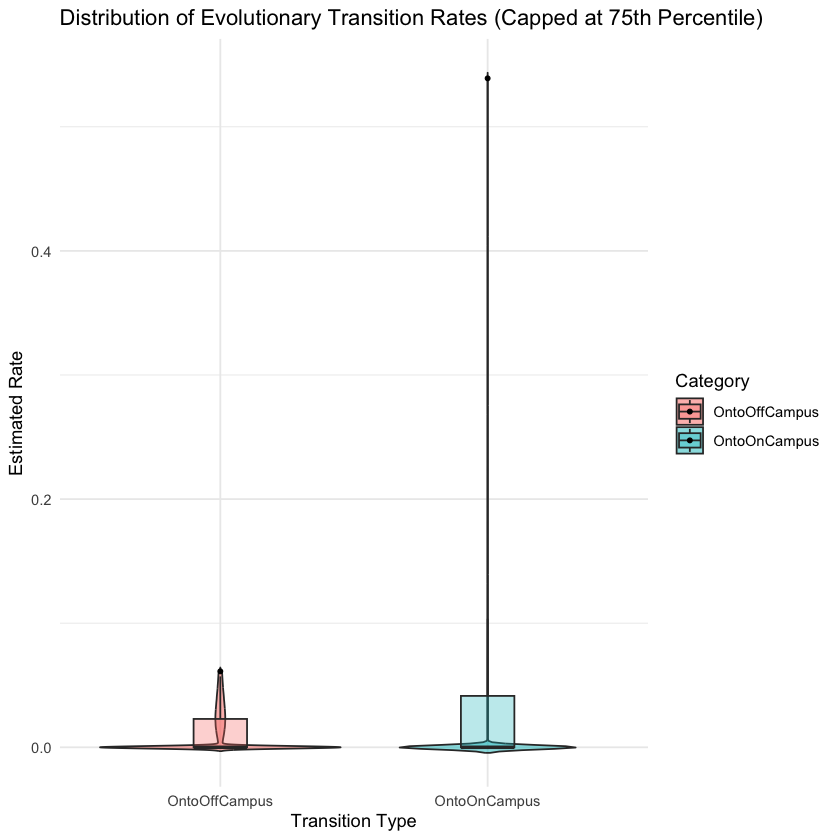

In [88]:
# Exclude "Off to on"
df <- df %>% select(-"Off.Campus..South")


# Rename columns for easier conventions
names(df) <- sub("\\.+", "To", names(df))

#colnames(df)



# Convert selected data to long format
df_long <- df %>%
  pivot_longer(cols = -Sample, names_to = "Category", values_to = "Value")

#Merge MartinToNorth and MartinToNorth.1 (and other Similar categories split into .1 naming) in the same category. 
#Comment lines 32-40 to see all data withouth this grouping. 
df_long <- df_long %>%
  mutate(
    Category = case_when(
      # Merge ".1", ".2" suffixes into base name (e.g., "X.1" → "X")
      grepl("\\.\\d+$", Category) ~ sub("\\.\\d+$", "", Category),
      # Keep others unchanged
      TRUE ~ Category
    )
  )


#group errthing
df_long <- df_long %>%
  mutate(Category = case_when(
    Category %in% c("CenterToEast" ,"CenterToMartin","CenterToNorth","CenterToNorth.1" ,"CenterToSouth","EastToMartin","EastToNorth","EastToNorth.1","EastToSouth","MartinToNorth","MartinToNorth.1","MartinToSouth","NorthToNorth","NorthToSouth","NorthToSouth.1") ~ "OntoOnCampus",
    Category %in% c("CenterToOff.Campus","EastToOff.Campus","MartinToOff.Campus" ,"NorthToOff.Campus","NorthToOff.Campus.1") ~ "OntoOffCampus",
    TRUE ~ Category  # Keep other categories unchanged
  ))

  
#lets restrict ourselves to the quantiles of the rate distribution, calculate in case we want to talk about it
df_summary <- df_long %>%
  group_by(Category) %>%
  summarise(Q3 = quantile(Value, 0.75, na.rm = TRUE))  
  
# Filter the dataset to only include values up to Q3 for plotting
df_filtered <- df_long %>%
  group_by(Category) %>%
  filter(Value <= quantile(Value, 0.75, na.rm = TRUE))

#lets use a violin plot to plot the truncated distributions
ggplot(df_filtered, aes(x = Category, y = Value, fill = Category)) +
  geom_violin(trim = FALSE, alpha = 0.5) +  # Violin plot showing truncated data
  geom_boxplot(width = 0.2, outlier.shape = NA, alpha = 0.3) +  # Faint boxplot for context
  geom_point(data = df_summary, aes(x = Category, y = Q3), size = 1, color = "black") +  # Q3 marker
  labs(title = "Distribution of Evolutionary Transition Rates (Capped at 75th Percentile)",
       x = "Transition Type",
       y = "Estimated Rate") +
  theme_minimal()



### Step 4: Plot all transition rates
Plot with ggplot (geom_violin)

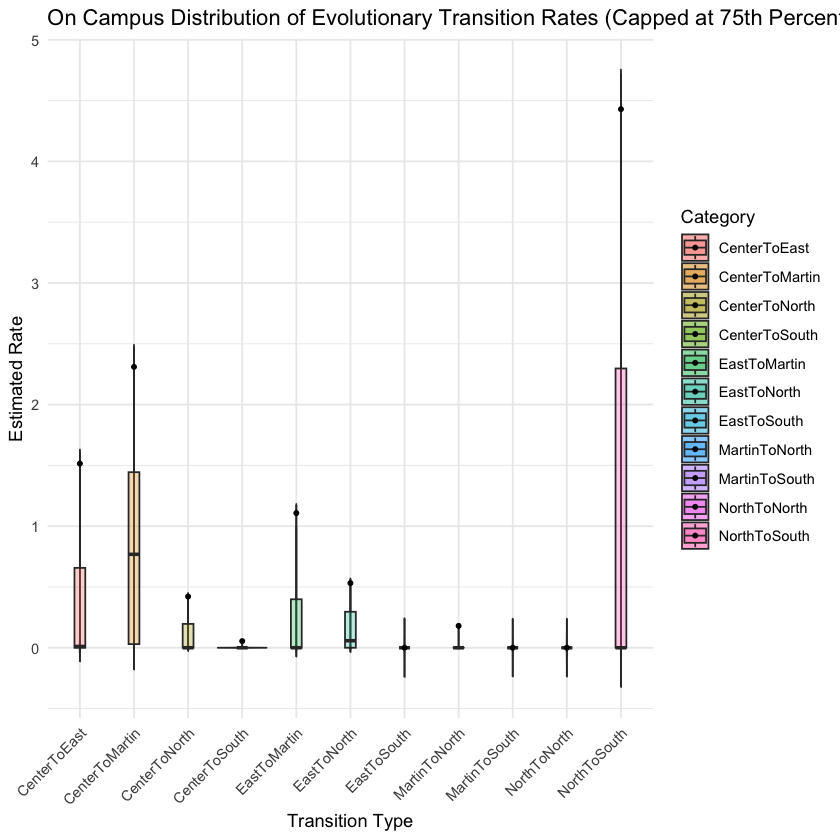

In [90]:
#read BEAST log back into memory. 
df<-read.csv("/Users/juanbolanos/Desktop/Phylogenetisc_Paper/Dornburg-Review/Final-Data/scripts/Ridge_Line_Violin_Plot_Tracer_Frequencies/input/Geo_Location_Transition_Rates_OnCampusOnly.csv")

# Rename columns for easier conventions
names(df) <- sub("\\.+", "To", names(df))

# Convert selected data to long format
df_long <- df %>%
  pivot_longer(cols = -Sample, names_to = "Category", values_to = "Value")

#Merge MartinToNorth and MartinToNorth.1 (and other Similar categories split into .1 naming) in the same category. 
#Comment lines 32-40 to see all data withouth this grouping. 
df_long <- df_long %>%
  mutate(
    Category = case_when(
      # Merge ".1", ".2" suffixes into base name (e.g., "X.1" → "X")
      grepl("\\.\\d+$", Category) ~ sub("\\.\\d+$", "", Category),
      # Keep others unchanged
      TRUE ~ Category
    )
  )
  
#lets restrict ourselves to the quantiles of the rate distribution, calculate in case we want to talk about it
df_summary <- df_long %>%
  group_by(Category) %>%
  summarise(Q3 = quantile(Value, 0.75, na.rm = TRUE))  
  
# Filter the dataset to only include values up to Q3 for plotting
df_filtered <- df_long %>%
  group_by(Category) %>%
  filter(Value <= quantile(Value, 0.75, na.rm = TRUE))



#lets use a violin plot to plot the truncated distributions
ggplot(df_filtered, aes(x = Category, y = Value, fill = Category)) +
  geom_violin(trim = FALSE, alpha = 0.5) +  # Violin plot showing truncated data
  geom_boxplot(width = 0.2, outlier.shape = NA, alpha = 0.3) +  # Faint boxplot for context
  geom_point(data = df_summary, aes(x = Category, y = Q3), size = 1, color = "black") +  # Q3 marker
  labs(title = "On Campus Distribution of Evolutionary Transition Rates (Capped at 75th Percentile)",
       x = "Transition Type",
       y = "Estimated Rate") +
  theme_minimal()+ 
  theme(axis.text.x = element_text(angle = 45, hjust = 1)
  )